In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sb 


In [2]:
df = pd.read_csv('Heart.csv')
df

Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0             1   63    1       typical     145   233    1        2    150   
1             2   67    1  asymptomatic     160   286    0        2    108   
2             3   67    1  asymptomatic     120   229    0        2    129   
3             4   37    1    nonanginal     130   250    0        0    187   
4             5   41    0    nontypical     130   204    0        2    172   
..          ...  ...  ...           ...     ...   ...  ...      ...    ...   
298         299   45    1       typical     110   264    0        0    132   
299         300   68    1  asymptomatic     144   193    1        0    141   
300         301   57    1  asymptomatic     130   131    0        0    115   
301         302   57    0    nontypical     130   236    0        2    174   
302         303   38    1    nonanginal     138   175    0        0    173   

     ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0        0      2.3      3  0.0       fixed   No  
1        1      1.5      2  3.0      normal  Yes  
2        1      2.6      2  2.0  reversable  Yes  
3        0      3.5      3  0.0      normal   No  
4        0      1.4      1  0.0      normal   No  
..     ...      ...    ...  ...         ...  ...  
298      0      1.2      2  0.0  reversable  Yes  
299      0      3.4      2  2.0  reversable  Yes  
300      1      1.2      2  1.0  reversable  Yes  
301      0      0.0      2  1.0      normal  Yes  
302      0      0.0      1  NaN      normal   No  

[303 rows x 15 columns]

ERROR CORRECTING

In [3]:
df.isna().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [4]:
df1 = df.fillna(method='bfill')
df1

Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0             1   63    1       typical     145   233    1        2    150   
1             2   67    1  asymptomatic     160   286    0        2    108   
2             3   67    1  asymptomatic     120   229    0        2    129   
3             4   37    1    nonanginal     130   250    0        0    187   
4             5   41    0    nontypical     130   204    0        2    172   
..          ...  ...  ...           ...     ...   ...  ...      ...    ...   
298         299   45    1       typical     110   264    0        0    132   
299         300   68    1  asymptomatic     144   193    1        0    141   
300         301   57    1  asymptomatic     130   131    0        0    115   
301         302   57    0    nontypical     130   236    0        2    174   
302         303   38    1    nonanginal     138   175    0        0    173   

     ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0        0      2.3      3  0.0       fixed   No  
1        1      1.5      2  3.0      normal  Yes  
2        1      2.6      2  2.0  reversable  Yes  
3        0      3.5      3  0.0      normal   No  
4        0      1.4      1  0.0      normal   No  
..     ...      ...    ...  ...         ...  ...  
298      0      1.2      2  0.0  reversable  Yes  
299      0      3.4      2  2.0  reversable  Yes  
300      1      1.2      2  1.0  reversable  Yes  
301      0      0.0      2  1.0      normal  Yes  
302      0      0.0      1  NaN      normal   No  

[303 rows x 15 columns]

DATA TRANSFORMATION

In [5]:
df1.loc[df1['Sex']==1,'Sex']='M'
df1.loc[df1['Sex']==0,'Sex']='F'
df1

Unnamed: 0  Age Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0             1   63   M       typical     145   233    1        2    150   
1             2   67   M  asymptomatic     160   286    0        2    108   
2             3   67   M  asymptomatic     120   229    0        2    129   
3             4   37   M    nonanginal     130   250    0        0    187   
4             5   41   F    nontypical     130   204    0        2    172   
..          ...  ...  ..           ...     ...   ...  ...      ...    ...   
298         299   45   M       typical     110   264    0        0    132   
299         300   68   M  asymptomatic     144   193    1        0    141   
300         301   57   M  asymptomatic     130   131    0        0    115   
301         302   57   F    nontypical     130   236    0        2    174   
302         303   38   M    nonanginal     138   175    0        0    173   

     ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0        0      2.3      3  0.0       fixed   No  
1        1      1.5      2  3.0      normal  Yes  
2        1      2.6      2  2.0  reversable  Yes  
3        0      3.5      3  0.0      normal   No  
4        0      1.4      1  0.0      normal   No  
..     ...      ...    ...  ...         ...  ...  
298      0      1.2      2  0.0  reversable  Yes  
299      0      3.4      2  2.0  reversable  Yes  
300      1      1.2      2  1.0  reversable  Yes  
301      0      0.0      2  1.0      normal  Yes  
302      0      0.0      1  NaN      normal   No  

[303 rows x 15 columns]

DATA MODEL BUILDING

In [6]:
import matplotlib.pyplot as plt

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_8528\1124221223.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(data = df1.corr(),cbar=True,square=True,annot=True)


<AxesSubplot: >

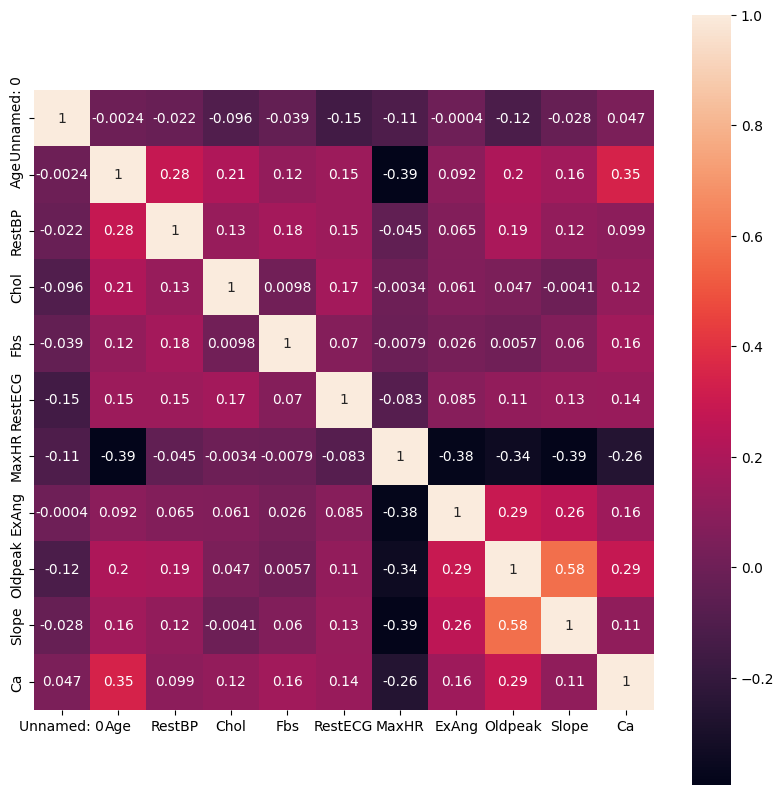

In [8]:
plt.figure(figsize=(10,10))
sb.heatmap(data = df1.corr(),cbar=True,square=True,annot=True)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
attribute = df[['Age','Chol','MaxHR']]
target = df['RestECG']
train_x,test_x,train_y,test_y=train_test_split(attribute,target,test_size=0.25,random_state=0)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,r2_score,mean_absolute_error
lr = LogisticRegression()
lr.fit(train_x,train_y)
lr_y_pred = lr.predict(test_x)
lr_acc = accuracy_score(test_y,lr_y_pred)
lr_acc

0.5789473684210527